**Exercise** :


---
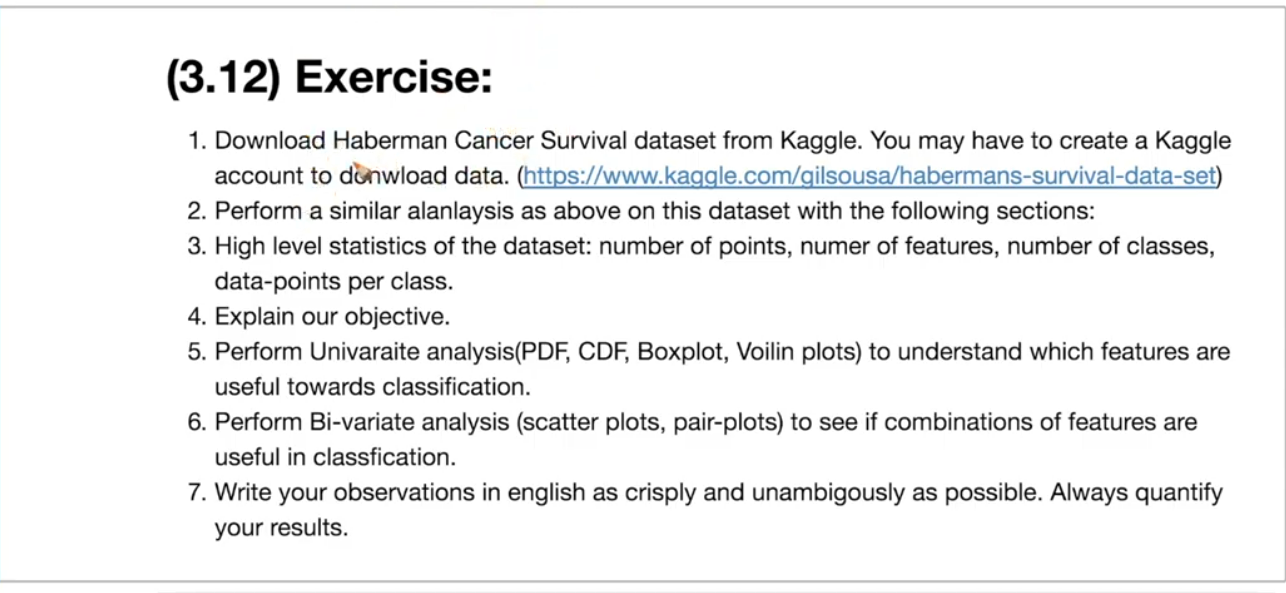


In [19]:
import pandas as pd
df = pd.read_csv('haberman.csv')

**Objective :** 
 We have three Features : Patient_Age, Operation_Year, PAN (positive axillary nodes detected) . We have to classify that 
      
      Survival_Status Data Points Meaning : 
      # 1 = the patient survived 5 years or longer
      # 2 = the patient died within 5 year

  >  Our Task is to classify a diagonised & treated with breast cancer patient will die within 5 Year or not ?

In [20]:
#  rename the existing DataFrame (rather than creating a copy) 
df.rename(columns={'30': 'patient_age', '64': 'operation_year', '1':'axill_node', '1.1' : 'survival_status'}, inplace=True)


In [21]:

#Q . What are the features in dataset ?
print(df.columns)

Index(['patient_age', 'operation_year', 'axill_node', 'survival_status'], dtype='object')


In [22]:
# Q. How many Datapoints (rows) in our dataset ? 
# dataset size
print("\n No. of  datapoints (rows): ",df.shape[0])
print("\n No. of  features (columns): ",df.shape[1])


 No. of  datapoints (rows):  305

 No. of  features (columns):  4


In [23]:
# Q. Is my dataset is balanced or imbalanced ?
df['survival_status'].value_counts()


survival_status
1    224
2     81
Name: count, dtype: int64

Observation :

          *  After treatment, there are more chances to survive 5 years or longer
          * dataset is not balanced . ie. no. of datapoints in each class (die_within 5 year OR live_5_year_or_longer )is not same.

**Univariate Analysis** :  CDF , PDF , Box Plot , Violin Plot

---



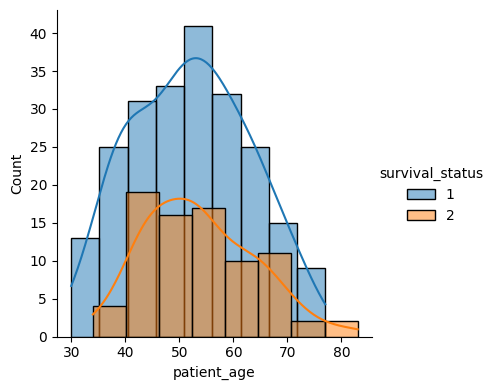

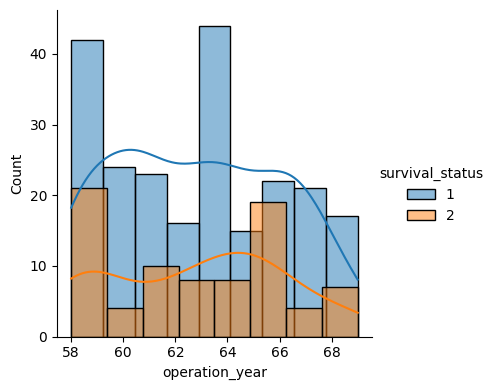

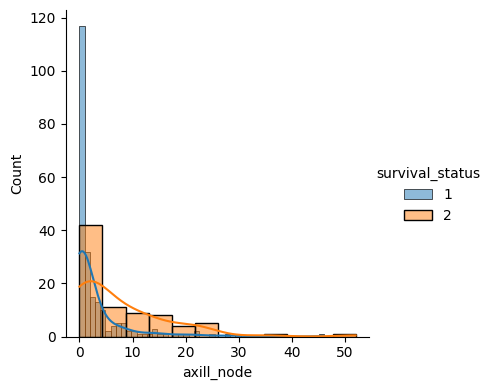

In [24]:
# Q. Which factors are most matters for a patient life ?

# (Histogram & PDF for each features)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df,hue="survival_status", height= 4).map(sns.histplot, "patient_age",kde = True ).add_legend();
sns.FacetGrid(df,hue="survival_status", height= 4).map(sns.histplot, "operation_year",kde = True ).add_legend();
sns.FacetGrid(df,hue="survival_status", height= 4).map(sns.histplot, "axill_node",kde = True ).add_legend();

plt.show()

Observation : 

```
 * if axill_node are more , then a patient have more chances to die within 5 years .
```



In [25]:
# taking dataframe for each class
df_more_than_5 =  df.loc[df["survival_status"]==1]
df_less_than_5 =  df.loc[df["survival_status"]==2]


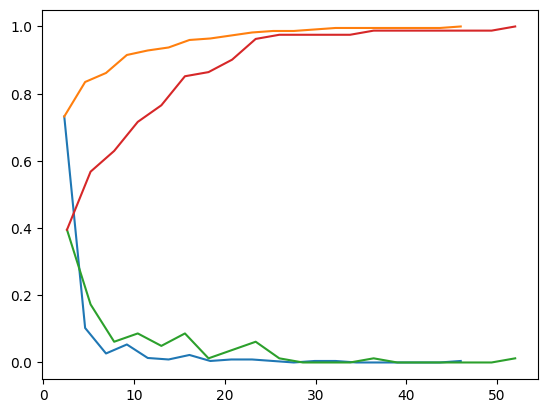

x-axis : axill_nodes
y-axis : No. Of Patient

 PDF/CDF of axill_nodes of patient who survive 5 years or longer
blue : PDF
orange : CDF


In [26]:
# PDF & CDF of axill_node for  patients who lives more than 5 Years or die within 5 Years
# axill_node  are broken into 10 bins of histogram to find PDF

#survive 5 years or longer
counts , bin_edges = np.histogram(df_more_than_5['axill_node'],bins=20,density = True)
PDF = counts/sum(counts)
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF)
plt.plot(bin_edges[1:],CDF)

# die within 5 years
counts , bin_edges = np.histogram(df_less_than_5['axill_node'],bins=20,density = True)
PDF = counts/sum(counts)
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF)
plt.plot(bin_edges[1:],CDF)

plt.show()
print("x-axis : axill_nodes")
print("y-axis : No. Of Patient\n")
print(" PDF/CDF of axill_nodes of patient who survive 5 years or longer")
print("blue : PDF")
print("orange : CDF")

      No any conclusion can be drawn using CDF here.

**Statical Analysis of dataset** :     

In [27]:
# Taking Mean as central Tendency
print("Mean :")
print(np.mean(df_more_than_5['axill_node']))
print(np.mean(df_less_than_5['axill_node']))

print("\nStandard Deviation : ")
print(np.std(df_more_than_5['axill_node']))
print(np.std(df_less_than_5['axill_node']))


Mean :
2.799107142857143
7.45679012345679

Standard Deviation : 
5.869092706952764
9.128776076761635


In [28]:
!pip install statsmodels


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip


Observartion :           

        * No. of axial nodes are lies between 0 to 7 for the most of  patient who survive 5 year or longer
        * No. of axial nodes are  lies between 2 to 16 for most of the patient who die within 5 years

In [29]:
from statsmodels import robust


# Quartile
print("\nQuantiles : ") # all the percentile between 0,100 with the gap of 25% {0th ,25th, 50th , 75th}
print(np.percentile(df_more_than_5['axill_node'],np.arange(0,100,25)))
print(np.percentile(df_less_than_5['axill_node'],np.arange(0,100,25)))


print("\n Median Absolute Deviation :")
print(robust.mad(df_more_than_5['axill_node']))
print(robust.mad(df_less_than_5['axill_node']))


#90th percentile
print("\n90th percentiles value : ") 
print(robust.mad(df_more_than_5['axill_node'],90))
print(robust.mad(df_less_than_5['axill_node'],90))



Quantiles : 
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

 Median Absolute Deviation :
0.0
5.930408874022408

90th percentiles value : 
0.0
0.044444444444444446


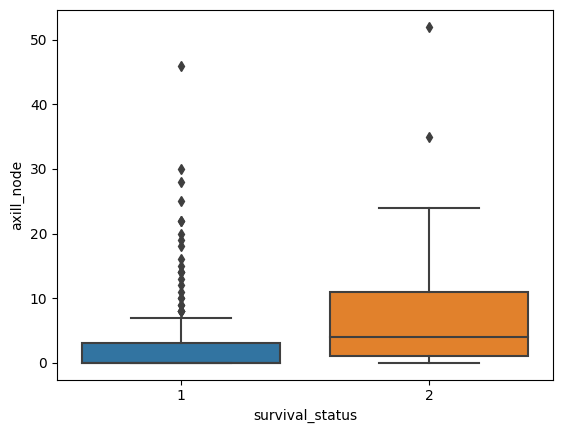

In [30]:
# Taking Median as central tendency
# box plot for axill_node
sns.boxplot(x="survival_status",y='axill_node',data=df)
plt.show()

Observation: 

    * Most of the patient who survive 5 years or longer have axial_nodes are approx less than 4
    * Most of the patient who die whithin 5 years have axial nodes are in between 2 and 10.
    * A patient have  no of axial_nodes greater than four then there is more chance to die within 5 years. 

**Violin Plot** : Combined plot of Box-plot , PDF and Histogram

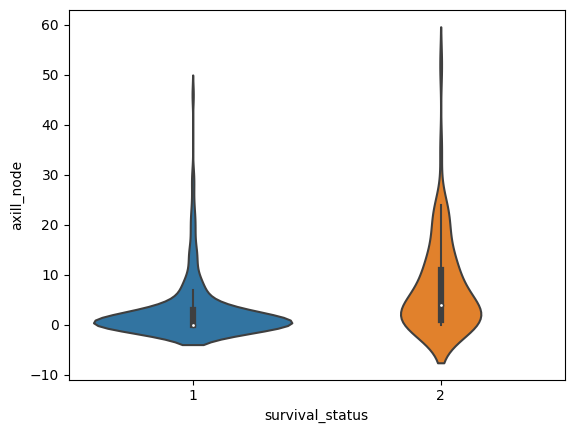

In [31]:
sns.violinplot(x="survival_status", y="axill_node", data=df, size=8)
plt.show()

Observation:

      * the patient who dies within 5 year have 

**Bi-Variate Analysis :** pair-plot



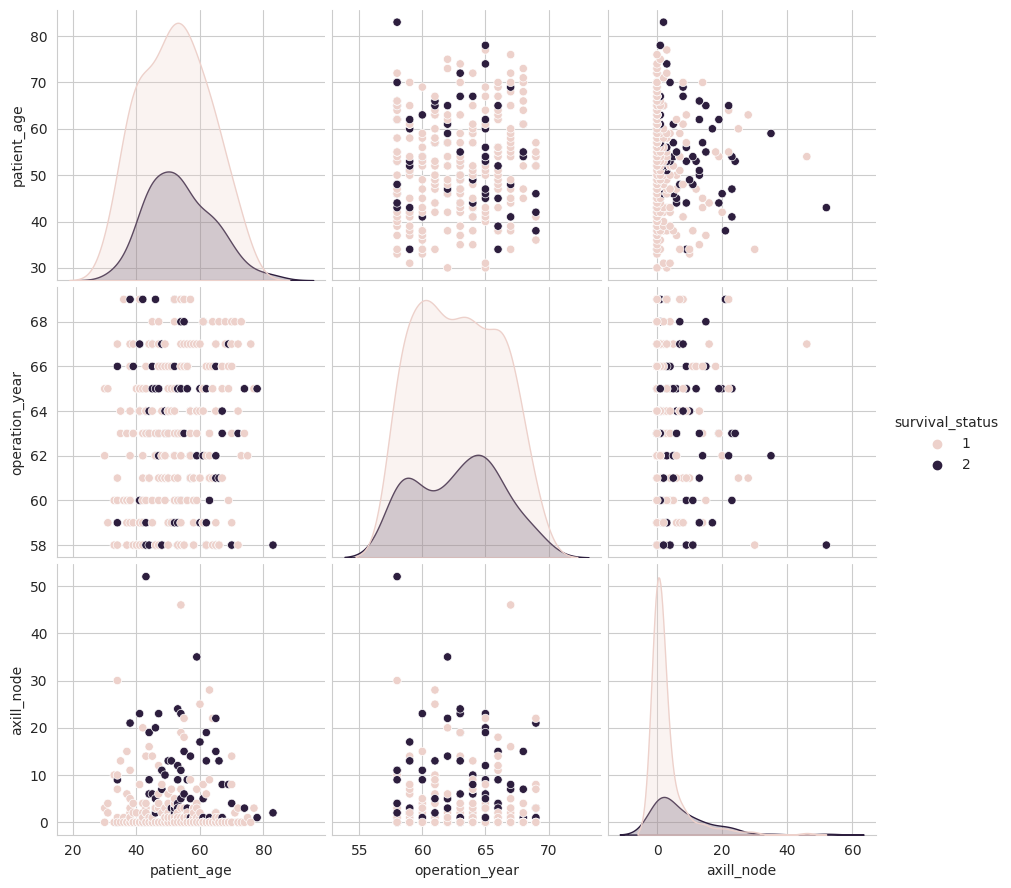

In [32]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="survival_status",height=3);
plt.show()

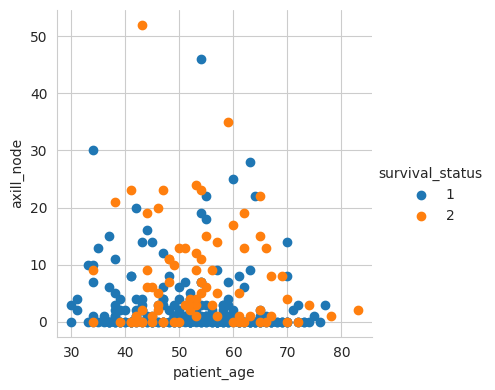

In [33]:
sns.set_style("whitegrid"); 
sns.FacetGrid(df,hue="survival_status",height=4).map(plt.scatter, "patient_age","axill_node").add_legend(); # hue="species" means  color the category of points in species column
plt.show();  

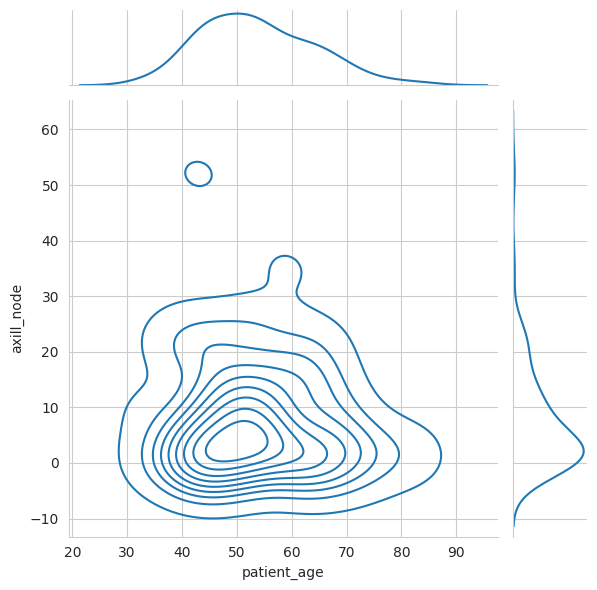

In [34]:
# 2D density plot for setosa flower  or countour probability density plot
sns.jointplot(x="patient_age",y="axill_node",data=df_less_than_5, kind = "kde");
plt.show();

3 D Plot



In [35]:
import plotly.express as px
fig = px.scatter_3d(df, x='patient_age', y='operation_year', z='axill_node',
              color='survival_status')
fig.show()